In [18]:
import numpy as np 
import pandas as pd 
import seaborn as sns 


In [19]:
df = pd.read_csv('cardata.csv')

In [20]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [21]:
df.shape

(301, 9)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [23]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [24]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [25]:
df.duplicated().sum()

2

In [26]:
df.drop_duplicates(inplace=True)

In [27]:
# checking distribution of categorical data 

df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64

In [28]:
df['Seller_Type'].value_counts(
    
)

Seller_Type
Dealer        193
Individual    106
Name: count, dtype: int64

In [29]:
df['Transmission'].value_counts()

Transmission
Manual       260
Automatic     39
Name: count, dtype: int64

In [30]:
# encoding the categorical data 
df.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)

df.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace=True)

df.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)



In [31]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [32]:
df.drop(columns=['Car_Name'], inplace=True)



In [44]:
x = df.drop(columns=['Selling_Price'])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
y = df['Selling_Price']



In [45]:
from sklearn.model_selection import train_test_split

In [46]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=1)


In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)
ypred = lr.predict(xtest)


In [49]:
from sklearn.metrics import r2_score

In [50]:
r2_score(ytest, ypred)

0.862275792328432

In [51]:
r2_score(ypred,ytest)

0.9093662998964879

In [52]:
import matplotlib.pyplot as plt 

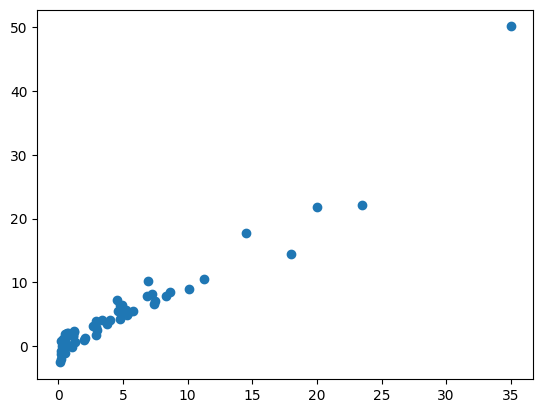

In [54]:
plt.scatter(ytest, ypred)

In [55]:
from sklearn.linear_model import Lasso

In [56]:
lasso = Lasso()
lasso.fit(xtrain, ytrain)

Lasso()

In [57]:
ypred = lasso.predict(xtest)


In [58]:
r2_score(ytest, ypred)

0.8935663976854686

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
rfr = RandomForestRegressor()
rfr.fit(xtrain, ytrain)
r2_score(ytest, ypred)

0.8935663976854686